# Clustering and Gaussian Mixture Models (GMMs)

**COMP9418-17s2, W04 Tutorial**

- Instructor: Edwin V. Bonilla
- School of Computer Science and Engineering, UNSW Sydney
- Questions by Daniel Mackinlay and Edwin V. Bonilla
$$
% macros
\newcommand{\indep}{\perp \!\!\!\perp}
$$

In this section we will study the behaviour of Gaussian mixture models using a supplied data set, and see how the models estimated using Maximum Likelihood via the Expectation Maximisation.


## Technical prerequisites

You will need certain packages installed to run this notebook.

If you are using ``conda``'s default
[full installation](https://conda.io/docs/install/full.html),
these requirements should all be satisfied already.

If you are using ``virtualenv`` or other native package management,
you may need to run these commands:

```python
pip install scikit-learn seaborn
```
You will also need to download the preprocessed `usps_gmm_3d.mat` data set
(see data file for this tutorial in WebCMS3)
and put it in the same folder as this notebook.



Once we have done all that, we
import some useful modules for later use.

In [1]:
# Make division default to floating-point, saving confusion
from __future__ import division
from __future__ import print_function

# Necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from random import random
from scipy.io import loadmat
import seaborn as sns
from collections import OrderedDict as odict

# Put the graphs where we can see them
%matplotlib inline
sns.set(style="ticks")

# easier debugging display
np.set_printoptions(edgeitems=5, precision=3, suppress=False)
from pprint import pprint

# Data loading


The file the `usps_gmm_3d.mat` file contains the following variables:

- `xtrain3d` : Three-dimensional PCA representation of training examples of the digits 2, 3 and 5. Each row is a 3-vector corresponding to one digit.
- `xtest3d` : Three-dimensional PCA representation of testing examples of the digits 2, 3 and 5. Each row is a 3-vector corresponding to one digit.
- `ytrain` : Corresponding labels of `xtrain3d`, containing 2, 3 or 5 accordingly.
- `ytest` : Corresponding labels of `xtest3d`, containing 2, 3 or 5 accordingly.
- `mu` : Mean vector (in original data space) used in PCA decomposition.
- `E`: Matrix of eigenvectors used in PCA decomposition.

The details of the *PCA* representation of the data aren't important for this tutorial; It's a low-dimensional representation of the full images - in this case, 256-pixel images are squished down into 3 dimensions. If you are curious about this compression trick, you can use the variables `mu` and `E` to explore it (and even to reconstruct the original digits, which we will do in the final exercise.) But for now, we are interested in using the 3-dimensional representations without worrying too much about the details.

In [21]:
data = loadmat('./usps_gmm_3d.mat')
xtrain3d = data['xtrain3d']
ytrain = data['ytrain']
xtest3d = data['xtest3d']
ytest = data['ytest']
pca_mu = data['mu']
pca_e = data['E']
data.keys()
del(data)

In [22]:
print(xtest3d)

[[-114.419  346.693  212.121]
 [ 376.369  193.062  756.004]
 [-470.644  239.506 -332.081]
 [ 241.151 -198.737   32.047]
 [-558.99   413.774  156.396]
 ..., 
 [  81.32  -169.028  319.761]
 [ 516.264  437.701  -16.58 ]
 [ 339.007  -24.22  -105.861]
 [ 626.741   12.184  222.665]
 [ 154.637  612.221 -216.263]]


## Exercise
create an index array for each digit in each 3d *x* dataset.
For example, `x2test` should be an array such that `xtest3d[xtest2, :]` is an array containing all the examples of digit 2 and nothing else.

If you have problems with the shapes of the array not matching up, remember that `numpy` arrays have, for example,  `ravel` and `flatten` methods to produce flat arrays suitable for indexing.

In [26]:
# Your code here

for i, num in enumerate(ytest):
    if num == 2:
        xtest2.append(i)
    elif num == 3:
        xtest3.append(i)
    else:
        xtest5.append(i)
   
print(xtest3d[xtest5, :])

[[-114.419  346.693  212.121]
 [ 376.369  193.062  756.004]
 [-558.99   413.774  156.396]
 [ 243.979  167.757  353.232]
 [ 236.953   85.764  572.659]
 ..., 
 [ 380.749  329.359  248.264]
 [ 404.836   49.353  571.232]
 [-323.543  -86.572  137.259]
 [-535.568 -289.023  287.111]
 [-147.295   85.096  517.457]]


## Exercise
Plot each the digits (assigning a different colour to each).

You can choose whether to do this in 2d or 3d.

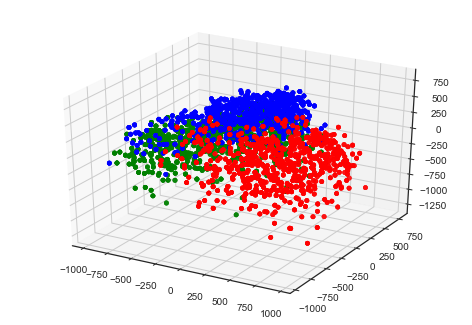

In [55]:
# Your code here
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()

def draw(data, color = None):
    x = []
    y = []
    z = []
    for i in data:
        x.append(i[0])
        y.append(i[1])
        z.append(i[2])      
    ax = fig.gca(projection='3d')
    ax.scatter(x, y, z, c=color)

draw(xtest3d[xtest5, :], 'b')
draw(xtest3d[xtest2, :], 'r')
draw(xtest3d[xtest3, :], 'g')
plt.show()



## Exercise

For the remainder of this assignment we will be concentrating on the digit 2. Plot its distribution separately, in 2 or 3 dimensions.


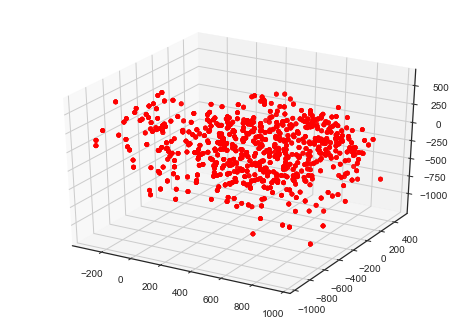

In [53]:
# Your code here
fig = plt.figure()
draw(xtest3d[xtest2, :], 'r')
plt.show()


# Gaussian mixtures
Now we will fit a Gaussian mixture model to the data.

We don't need to write our own code here for one; instead we can use the convenient
[scikit-learn Gaussian Mixture](http://scikit-learn.org/stable/modules/mixture.html) models.


In [54]:
from sklearn import mixture

## Exercise

Fit a Gaussian mixture model (using fit mixture.GaussianMixture) to x2tr.

Repeat with number of components `n_components`=1, 2, 4, 6, 8, 10. For each, use `covariance_type='full'`.
Examine and understand the result.
How do we extract the clusters and their shapes? What does the `predict_proba` method do?
How about `score_samples`?

In [75]:
import itertools
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
models = odict()

for n_components in (1, 2, 4, 6, 8, 10):
    # Your code here
    gmm = mixture.GaussianMixture(n_components=n_components, covariance_type='full').fit(xtest3d)
    models.update({n_components: gmm})
    print(gmm.predict(xtest3d))
    print(ytest.T)

[0 0 0 0 0 ..., 0 0 0 0 0]
[[5 5 3 2 5 ..., 2 2 2 2 3]]
[1 0 1 0 1 ..., 0 0 0 0 1]
[[5 5 3 2 5 ..., 2 2 2 2 3]]
[0 3 0 1 0 ..., 1 1 1 1 0]
[[5 5 3 2 5 ..., 2 2 2 2 3]]
[3 2 0 1 3 ..., 1 5 5 5 3]
[[5 5 3 2 5 ..., 2 2 2 2 3]]
[7 2 4 1 7 ..., 1 3 1 3 0]
[[5 5 3 2 5 ..., 2 2 2 2 3]]
[4 0 8 9 5 ..., 9 6 6 6 4]
[[5 5 3 2 5 ..., 2 2 2 2 3]]


In [81]:
for i in ytest.T[0]:
    print(i)

5
5
3
2
5
5
3
3
5
2
3
2
5
3
3
2
2
3
5
5
3
5
5
2
5
2
3
2
2
5
3
2
3
3
3
3
2
2
3
5
3
2
2
5
2
5
2
3
2
5
2
2
3
2
2
5
3
5
3
5
3
2
2
5
5
3
2
2
2
3
5
3
2
5
3
2
5
2
2
5
5
3
2
5
3
2
5
2
2
5
2
3
2
5
3
2
3
5
3
2
3
5
5
2
5
2
3
2
5
5
2
2
3
2
3
3
2
2
2
5
2
5
2
3
3
2
3
5
2
2
5
5
5
3
5
3
3
2
3
2
2
5
5
3
2
5
5
2
5
5
3
2
2
5
2
5
3
2
5
3
3
3
5
3
2
5
3
2
2
2
3
5
5
3
5
3
2
2
5
5
5
3
5
5
2
2
2
5
2
3
3
5
2
2
2
5
5
2
3
3
5
3
3
3
2
5
5
3
5
5
2
3
5
3
5
2
5
5
5
3
3
5
3
3
5
3
5
2
2
2
5
2
5
3
5
3
3
2
3
3
2
3
5
5
2
3
2
5
2
3
5
2
5
3
3
2
3
3
3
3
5
3
5
2
3
5
3
5
3
2
2
2
3
3
2
5
3
3
2
2
2
5
3
3
5
2
5
5
5
2
3
5
5
3
5
3
5
3
2
3
2
2
5
3
3
3
5
3
5
3
2
2
5
2
2
3
2
3
5
5
5
3
2
3
2
2
5
3
5
2
2
3
3
2
3
5
2
3
5
5
5
2
2
5
5
2
5
2
3
5
3
3
2
3
3
3
5
2
2
5
2
5
2
5
2
5
2
2
5
3
2
5
5
3
5
5
5
3
3
3
5
5
5
3
5
2
3
5
2
3
2
5
2
2
5
3
2
5
3
5
2
3
2
2
5
2
5
5
2
2
2
5
2
3
5
3
5
2
5
5
3
5
2
3
2
2
3
3
3
5
5
5
5
2
3
5
5
5
5
2
2
3
3
5
3
2
3
5
3
2
3
5
5
5
3
3
5
3
3
3
3
2
5
5
5
5
3
3
3
2
5
3
5
3
3
3
3
3
5
5
5
5
2
5
2
3
3
2
3
5
3
2
5
2
2
2
3
5
3
5


In [88]:
max_components = 10
n_replicates = 10
test_loglikelihoods = []
train_loglikelihoods = []
n_components = []

# Your code here

for i in range(1,max_components):
    count = 0
    gmm = mixture.GaussianMixture(n_components=i, covariance_type='full').fit(xtest3d)
    pred = gmm.predict(xtest3d)
    real = ytest
    for j, num in enumerate(ytest.T[0]):
        #TODO: error, how to set it with tag.
        if num != pred[j]:
            print(i, pred[j])
            count += 1
    print(i, count)
     

1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0


2 1
2 0
2 1
2 0
2 1
2 0
2 1
2 0
2 0
2 0
2 0
2 1
2 0
2 0
2 0
2 1
2 0
2 0
2 0
2 0
2 0
2 1
2 0
2 1
2 0
2 1
2 1
2 0
2 1
2 0
2 0
2 1
2 0
2 1
2 0
2 0
2 0
2 0
2 0
2 1
2 0
2 1
2 0
2 0
2 0
2 0
2 0
2 0
2 1
2 0
2 0
2 0
2 1
2 0
2 0
2 0
2 0
2 0
2 0
2 1
2 0
2 0
2 0
2 1
2 0
2 1
2 0
2 0
2 1
2 1
2 1
2 1
2 0
2 1
2 0
2 1
2 0
2 0
2 1
2 0
2 0
2 1
2 0
2 0
2 0
2 0
2 1
2 1
2 0
2 0
2 0
2 1
2 0
2 1
2 0
2 1
2 1
2 0
2 0
2 1
2 0
2 1
2 0
2 0
2 0
2 0
2 1
2 0
2 1
2 0
2 0
2 0
2 1
2 1
2 0
2 0
2 1
2 1
2 0
2 1
2 1
2 0
2 1
2 0
2 1
2 1
2 0
2 0
2 0
2 0
2 1
2 0
2 1
2 1
2 0
2 1
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 1
2 0
2 1
2 0
2 0
2 1
2 1
2 1
2 1
2 0
2 1
2 1
2 0
2 0
2 0
2 0
2 0
2 1
2 1
2 1
2 0
2 0
2 0
2 0
2 1
2 0
2 1
2 1
2 0
2 0
2 0
2 0
2 0
2 1
2 0
2 0
2 1
2 1
2 1
2 1
2 1
2 0
2 1
2 1
2 1
2 1
2 0
2 0
2 0
2 0
2 0
2 0
2 1
2 1
2 0
2 0
2 1
2 0
2 0
2 0
2 1
2 0
2 0
2 1
2 1
2 0
2 0
2 0
2 0
2 0
2 0
2 1
2 0
2 0
2 1
2 0
2 1
2 1
2 0
2 0
2 1
2 0
2 0
2 0
2 1
2 0
2 0
2 1
2 1
2 0
2 0
2 0
2 0
2 0
2 1
2 0
2 1
2 0
2 1
2 0
2 1
2 0
2 0
2 0
2 0
2 0
2 1


4 2
4 0
4 0
4 3
4 1
4 3
4 3
4 3
4 3
4 0
4 3
4 0
4 0
4 1
4 1
4 1
4 3
4 3
4 3
4 0
4 3
4 1
4 1
4 3
4 0
4 0
4 3
4 3
4 0
4 1
4 1
4 2
4 3
4 2
4 3
4 2
4 0
4 0
4 1
4 0
4 3
4 3
4 2
4 3
4 3
4 0
4 3
4 0
4 0
4 3
4 0
4 1
4 0
4 0
4 1
4 0
4 3
4 1
4 3
4 3
4 3
4 1
4 3
4 0
4 0
4 1
4 1
4 1
4 0
4 3
4 1
4 3
4 0
4 1
4 3
4 0
4 2
4 3
4 2
4 3
4 3
4 0
4 2
4 0
4 0
4 2
4 3
4 0
4 0
4 1
4 1
4 3
4 3
4 1
4 3
4 0
4 3
4 1
4 1
4 3
4 2
4 2
4 0
4 3
4 1
4 3
4 3
4 3
4 0
4 2
4 2
4 0
4 3
4 0
4 3
4 0
4 0
4 0
4 0
4 0
4 1
4 1
4 0
4 3
4 1
4 0
4 0
4 3
4 0
4 0
4 3
4 2
4 3
4 3
4 1
4 0
4 2
4 3
4 0
4 3
4 0
4 3
4 1
4 1
4 2
4 1
4 0
4 2
4 3
4 1
4 3
4 3
4 3
4 1
4 0
4 0
4 0
4 1
4 1
4 1
4 1
4 0
4 3
4 0
4 3
4 3
4 3
4 0
4 1
4 3
4 0
4 0
4 2
4 3
4 0
4 1
4 0
4 0
4 0
4 0
4 3
4 0
4 2
4 2
4 1
4 1
4 0
4 3
4 1
4 3
4 0
4 3
4 3
4 3
4 0
4 3
4 2
4 0
4 3
4 0
4 3
4 0
4 0
4 0
4 3
4 3
4 1
4 1
4 0
4 1
4 3
4 3
4 3
4 3
4 3
4 3
4 2
4 1
4 0
4 3
4 3
4 0
4 3
4 3
4 0
4 0
4 2
4 0
4 0
4 2
4 0
4 1
4 2
4 3
4 2
4 0
4 0
4 2
4 0
4 2
4 0
4 3
4 3
4 3
4 0
4 0
4 2
4 1
4 3
4 0


5 3
5 3
5 1
5 3
5 0
5 0
5 0
5 3
5 3
5 0
5 4
5 0
5 1
5 0
5 1
5 4
5 3
5 4
5 1
5 3
5 0
5 0
5 4
5 1
5 3
5 3
5 3
5 4
5 3
5 1
5 4
5 3
5 3
5 0
5 1
5 3
5 3
5 4
5 4
5 3
5 2
5 1
5 1
5 0
5 0
5 0
5 3
5 4
5 1
5 1
5 0
5 0
5 0
5 4
5 1
5 3
5 3
5 3
5 2
5 2
5 4
5 4
5 3
5 3
5 3
5 0
5 4
5 0
5 0
5 4
5 1
5 0
5 3
5 4
5 1
5 3
5 1
5 0
5 0
5 3
5 0
5 1
5 4
5 4
5 3
5 0
5 3
5 1
5 1
5 0
5 1
5 1
5 3
5 1
5 0
5 0
5 3
5 3
5 3
5 1
5 3
5 0
5 2
5 0
5 3
5 4
5 4
5 4
5 0
5 3
5 4
5 0
5 0
5 3
5 0
5 0
5 3
5 4
5 1
5 3
5 0
5 0
5 4
5 4
5 3
5 3
5 1
5 4
5 4
5 0
5 0
5 4
5 4
5 0
5 1
5 1
5 1
5 3
5 4
5 3
5 0
5 0
5 3
5 0
5 0
5 4
5 0
5 4
5 2
5 3
5 4
5 4
5 1
5 3
5 0
5 1
5 1
5 0
5 0
5 3
5 1
5 3
5 4
5 0
5 0
5 0
5 0
5 1
5 1
5 3
5 2
5 0
5 3
5 3
5 3
5 3
5 4
5 0
5 0
5 1
5 3
5 0
5 3
5 2
5 3
5 0
5 4
5 0
5 3
5 0
5 0
5 0
5 2
5 3
5 0
5 4
5 3
5 0
5 4
5 1
5 3
5 3
5 0
5 4
5 0
5 0
5 1
5 1
5 1
5 3
5 3
5 4
5 3
5 3
5 4
5 0
5 0
5 4
5 4
5 4
5 0
5 3
5 4
5 4
5 4
5 4
5 1
5 0
5 0
5 3
5 4
5 2
5 0
5 1
5 1
5 1
5 4
5 4
5 0
5 0
5 4
5 4
5 4
5 0
5 3
5 0
5 0
5 3
5 3
5 0


7 0
7 1
7 0
7 4
7 6
7 0
7 0
7 5
7 0
7 4
7 1
7 4
7 5
7 0
7 6
7 1
7 4
7 1
7 6
7 6
7 1
7 4
7 0
7 6
7 1
7 0
7 1
7 0
7 1
7 0
7 6
7 5
7 1
7 0
7 4
7 6
7 4
7 5
7 0
7 6
7 5
7 5
7 1
7 4
7 5
7 6
7 1
7 1
7 5
7 5
7 6
7 5
7 6
7 4
7 4
7 5
7 0
7 5
7 5
7 0
7 5
7 1
7 1
7 5
7 6
7 0
7 1
7 4
7 0
7 6
7 1
7 1
7 6
7 4
7 1
7 1
7 1
7 0
7 5
7 1
7 0
7 4
7 6
7 6
7 5
7 6
7 1
7 1
7 6
7 1
7 6
7 2
7 0
7 1
7 4
7 5
7 6
7 0
7 1
7 1
7 5
7 6
7 6
7 4
7 4
7 0
7 4
7 6
7 0
7 0
7 1
7 0
7 4
7 4
7 4
7 0
7 6
7 4
7 3
7 6
7 5
7 0
7 5
7 3
7 0
7 4
7 0
7 0
7 2
7 0
7 0
7 6
7 0
7 5
7 1
7 1
7 1
7 6
7 5
7 2
7 6
7 6
7 4
7 0
7 1
7 5
7 6
7 1
7 0
7 5
7 3
7 6
7 0
7 6
7 0
7 1
7 0
7 4
7 4
7 0
7 5
7 0
7 1
7 5
7 0
7 5
7 6
7 0
7 5
7 0
7 1
7 0
7 6
7 0
7 4
7 1
7 1
7 6
7 0
7 6
7 0
7 4
7 6
7 5
7 4
7 0
7 4
7 5
7 4
7 3
7 3
7 0
7 0
7 6
7 4
7 4
7 6
7 0
7 5
7 5
7 1
7 2
7 4
7 0
7 5
7 4
7 4
7 5
7 0
7 4
7 4
7 5
7 5
7 4
7 6
7 4
7 6
7 1
7 0
7 4
7 0
7 0
7 1
7 6
7 6
7 0
7 2
7 6
7 5
7 4
7 0
7 0
7 4
7 4
7 5
7 6
7 6
7 5
7 4
7 5
7 0
7 1
7 6
7 6
7 4
7 0
7 0
7 1
7 5
7 0


9 6
9 6
9 7
9 6
9 2
9 5
9 1
9 0
9 6
9 1
9 2
9 2
9 6
9 1
9 4
9 8
9 7
9 4
9 5
9 2
9 7
9 1
9 2
9 6
9 6
9 4
9 6
9 6
9 6
9 4
9 2
9 8
9 2
9 1
9 6
9 3
9 8
9 5
9 4
9 6
9 4
9 3
9 4
9 7
9 2
9 5
9 8
9 8
9 0
9 1
9 1
9 1
9 1
9 8
9 0
9 6
9 2
9 5
9 4
9 5
9 1
9 7
9 1
9 6
9 7
9 1
9 6
9 7
9 7
9 4
9 7
9 7
9 8
9 2
9 6
9 0
9 7
9 6
9 5
9 7
9 0
9 7
9 2
9 7
9 7
9 8
9 1
9 6
9 2
9 0
9 7
9 7
9 6
9 1
9 0
9 6
9 1
9 6
9 1
9 1
9 8
9 8
9 2
9 7
9 6
9 8
9 6
9 4
9 6
9 1
9 2
9 5
9 6
9 2
9 1
9 4
9 6
9 7
9 4
9 0
9 7
9 2
9 4
9 2
9 5
9 8
9 1
9 1
9 2
9 8
9 5
9 5
9 7
9 2
9 1
9 2
9 5
9 4
9 6
9 4
9 2
9 0
9 8
9 6
9 5
9 4
9 4
9 6
9 6
9 7
9 5
9 2
9 7
9 2
9 1
9 4
9 7
9 8
9 4
9 5
9 4
9 8
9 7
9 0
9 4
9 4
9 5
9 2
9 0
9 1
9 4
9 6
9 4
9 7
9 7
9 2
9 7
9 4
9 2
9 1
9 4
9 5
9 6
9 2
9 2
9 6
9 0
9 8
9 4
9 2
9 4
9 2
9 2
9 6
9 7
9 8
9 6
9 1
9 0
9 5
9 5
9 7
9 5
9 2
9 0
9 8
9 5
9 8
9 5
9 1
9 2
9 0
9 2
9 7
9 1
9 4
9 7
9 7
9 5
9 6
9 8
9 1
9 8
9 4
9 5
9 5
9 2
9 2
9 2
9 2
9 5
9 6
9 7
9 2
9 0
9 8
9 6
9 7
9 2
9 2
9 6
9 5
9 0
9 2
9 0
9 5
9 4
9 6
9 4
9 0


## Exercise

Create a scatterplot comparing the loglikelihood across the test and training data fits for each different number of components.
Are there differences between training and test log-likelihood? Why? What would a “good” number of mixture components be?

In [7]:
# Your code here

Next, we define a useful function:

In [8]:
def reconstruct_from_pca(mean):
    """
    Given a length 3 vector `mean`,
    reconstruct it as an image in the original space.
    """
    reconstruction = np.dot(pca_e, mean.reshape((-1, 1))) + pca_mu.T
    return reconstruction.reshape((16, 16))

## Exercise

In [ ]:
gmm = mixture.GaussianMixture(
    n_components=3,
    covariance_type='spherical')
gmm.fit(xtrain3d[x2train, :])
for mean in gmm.means_:
    plt.figure()
    plt.imshow(reconstruct_from_pca(mean))
               

Fit a mixture model to `xtrain3d` with K=3 components.
Use argument `covariance_type='diag'` to the `gmm.fit` method.
Project the centres of the learned mixture to the original ambient space using
`reconstruct_from_pca`.

Make an image plot of these centres. Are they significantly different?